# Import libraries

In [22]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE, ADASYN
from functions import functions as f
# import model
from sklearn.linear_model import LogisticRegression

# Import data

In [23]:
df = pd.read_csv('../data/crashes_cleaned_ohe.csv')

In [24]:
df.head()

,posted_speed_limit,num_units,sex,age,weather_condition_blowing snow,weather_condition_clear,weather_condition_cloudy/overcast,weather_condition_fog/smoke/haze,weather_condition_freezing rain/drizzle,weather_condition_rain,...,crash_month_4,crash_month_5,crash_month_6,crash_month_7,crash_month_8,crash_month_9,crash_month_10,crash_month_11,crash_month_12,serious_accident
0,35,2,1,44.0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,25,2,1,71.0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,15,2,1,60.0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,30,2,1,38.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,30,2,1,52.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


# Train-Test Split

In [25]:
X = df.drop(['serious_accident'], axis=1)
y = df.serious_accident

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=200)

In [26]:
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

## Balance the imbalaced data

In [27]:
balance = SMOTE()
X_train_scaled_balanced, y_train_balanced = balance.fit_sample(X_train_scaled, y_train)

# Run Model

In [28]:
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
logreg

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

In [29]:
logreg.fit(X_train_scaled_balanced, y_train_balanced)

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

# Predict

In [30]:
predictions_from_X_train = logreg.predict(X_train_scaled_balanced)
predictions_from_X_test = logreg.predict(X_test_scaled)

## Variable Tracker

- X_train &rarr; X_train_scaled &rarr; **X_train_scaled_balanced**
    - used to create **predictions_from_X_train** which is to be compared to **y_train_balanced**
- X_test &rarr; **X_test_scaled**
    - used to create **predictions_from_X_test** which is to be compared to **y_test**
- y_train &rarr; **y_train_balanced**
- **y_test**

# Scoring 

## Create Scoring Dataframe

In [31]:
score_df = pd.DataFrame(columns = ['model', 'test_accuracy', 'test_f1', 'test_precision', 'test_recall', 'train_accuracy', 
                            'train_precision', 'train_recall'])

## Train Scoring

Accuracy: 62.0%
Precision: 58.9%
Recall: 79.7%
F1: 67.7%
Conufusion Matrix: 
[[19373 24387]
 [ 8873 34887]]




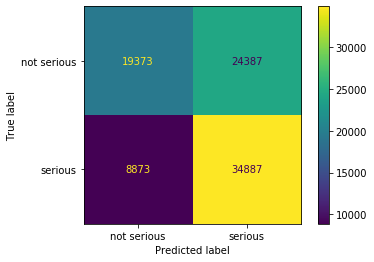

In [32]:
f.scoring(predictions_from_X_train, y_train_balanced, logreg, X_train_scaled_balanced)

## Test Scoring 

Accuracy: 44.2%
Precision: 2.3%
Recall: 67.4%
F1: 4.5%
Conufusion Matrix: 
[[4774 6152]
 [  71  147]]




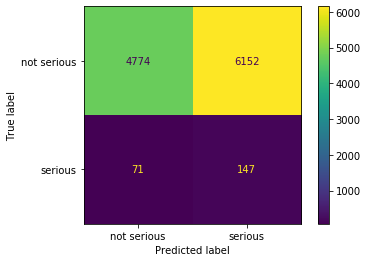

In [33]:
f.scoring(predictions_from_X_test, y_test, logreg, X_test_scaled)

## Add Scores Dataframe

In [34]:
score_df = f.add_scores_to_df("LogReg1", score_df, y_test, predictions_from_X_test, y_train_balanced, predictions_from_X_train)

In [35]:
score_df

,model,train_accuracy,test_accuracy,train_precision,test_precision,train_recall,test_recall,train_f1,test_f1
0,LogReg1,61.997,44.158,58.857,2.334,79.723,67.431,67.719,4.511


# Model 2

# Run Model

In [36]:
logreg2 = LogisticRegression(fit_intercept=False, C=100, solver='newton-cg')
logreg2

LogisticRegression(C=100, fit_intercept=False, solver='newton-cg')

In [37]:
logreg2.fit(X_train_scaled_balanced, y_train_balanced)

LogisticRegression(C=100, fit_intercept=False, solver='newton-cg')

# Predict

In [38]:
predictions_from_X_train2 = logreg2.predict(X_train_scaled_balanced)
predictions_from_X_test2 = logreg2.predict(X_test_scaled)

Accuracy: 62.0%
Precision: 58.9%
Recall: 79.7%
F1: 67.7%
Conufusion Matrix: 
[[19373 24387]
 [ 8873 34887]]




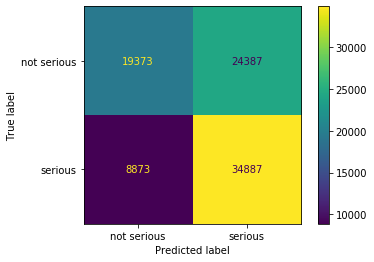

In [39]:
f.scoring(predictions_from_X_train2, y_train_balanced, logreg2, X_train_scaled_balanced)

Accuracy: 44.2%
Precision: 2.3%
Recall: 67.4%
F1: 4.5%
Conufusion Matrix: 
[[4775 6151]
 [  71  147]]




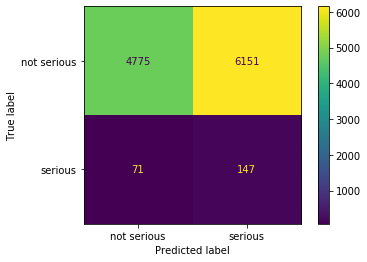

In [40]:
f.scoring(predictions_from_X_test2, y_test, logreg2, X_test_scaled)

In [41]:
score_df = f.add_scores_to_df("LogReg2", score_df, y_test, predictions_from_X_test2, y_train_balanced, predictions_from_X_train2)

In [42]:
score_df

,model,train_accuracy,test_accuracy,train_precision,test_precision,train_recall,test_recall,train_f1,test_f1
0,LogReg1,61.997,44.158,58.857,2.334,79.723,67.431,67.719,4.511
1,LogReg2,61.997,44.167,58.857,2.334,79.723,67.431,67.719,4.512
